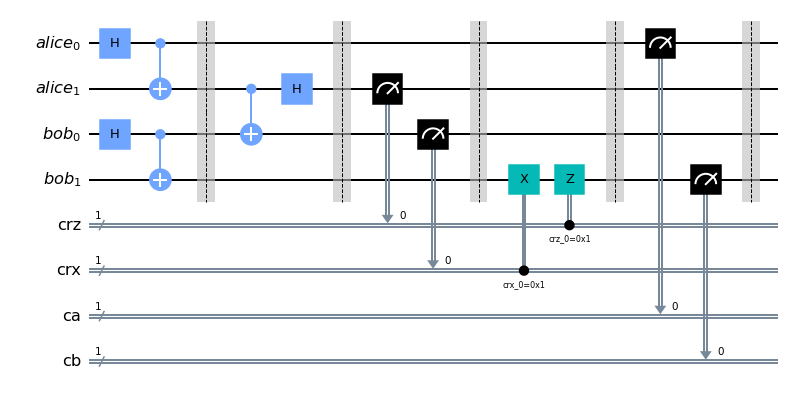

In [11]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_a = QuantumRegister(2, 'alice')
qreg_b = QuantumRegister(2, 'bob')
creg_cz = ClassicalRegister(1, 'crz')
creg_cx = ClassicalRegister(1, 'crx')
check_registers_a = ClassicalRegister(1, 'ca')
check_registers_b = ClassicalRegister(1, 'cb')
circuit = QuantumCircuit(qreg_a,qreg_b, creg_cz,creg_cx,check_registers_a,check_registers_b)

##### PASO 1 INICIALIZACION
circuit.h(qreg_a[0])
circuit.cx(qreg_a[0], qreg_a[1])
circuit.h(qreg_b[0])
circuit.cx(qreg_b[0], qreg_b[1])
circuit.barrier()

## PASO 2 ENVIO Y MEDICION DE BELL

circuit.cx(qreg_a[1], qreg_b[0])
circuit.h(qreg_a[1])
circuit.barrier()
circuit.measure(qreg_a[1], creg_cz[0])
circuit.measure(qreg_b[0], creg_cx[0])

circuit.barrier()

## PASO 3 CORRECCION DE LOS ESTADOS DE BOB

circuit.x(qreg_b[1]).c_if(creg_cx[0], 1)
circuit.z(qreg_b[1]).c_if(creg_cz[0], 1)


## PASO 4 COMPROBAMOS LOS RESULTADOS (OPCIONAL)
circuit.barrier()

circuit.measure(qreg_a[0], check_registers_a[0])
circuit.measure(qreg_b[1], check_registers_b[0])


circuit.save_statevector()
circuit.draw('mpl')

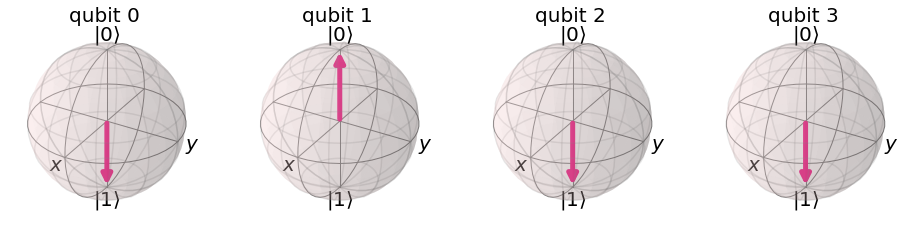

In [12]:
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
sim = Aer.get_backend('aer_simulator')
out_vector = sim.run(circuit).result().get_statevector()
plot_bloch_multivector(out_vector)